In [4]:
source("/home/user/data2/lit/bin/lit_utils.R")
source("/home/user/data3/lit/project/sORFs/sORFs.utils.R")
lib_text()
lib_plot()

In [5]:
full_set_p="/home/user/data3/lit/project/sORFs/09-CustomDb/formal_20250821/processed/annotation/RibORF_annot/candidate_ORFs/id_convert/augmented.add.custom.id.tsv"
rpkm_N_C_A_p="/home/user/data3/lit/project/sORFs/06-RNA-seq/02-output-isoseq-gtf-20250909/expr/rpkm_N_C_A.txt"
trans_gene_map_p="/home/user/data3/lit/project/sORFs/10-feature-egi/processed/feature_preprare/isoform.expr.info.txt"
orfs.ribo.3_ways.p="/home/user/data3/lit/project/sORFs/01-ribo-seq/analysis/20250813_demo_data_analysis/processed/orfs/merged/orfs.3_ways.txt"
orfs_ms_p="/home/user/data3/lit/project/sORFs/02-Mass-spec-20250723/analysis/20250910_c8_protein_map/results/1/add_info/orfs_ms_pb.txt"

In [6]:
fread_c(full_set_p) -> full_set
fread_c(rpkm_N_C_A_p) -> rpkm_N_C_A
fread_c(trans_gene_map_p) -> trans_gene_map
read.table(orfs.ribo.3_ways.p) -> orfs.3_ways
fread_c(orfs_ms_p) -> orfs_ms

ERROR: Error in scan(file = file, what = what, sep = sep, quote = quote, dec = dec, : line 2 did not have 63 elements


In [9]:
head(full_set,1)
head(rpkm_N_C_A,1)
head(trans_gene_map,1)
head(orfs.3_ways,1)
head(orfs_ms,1)

,ID,Seq,Length,Chr,Strand,Transcript_id,Type,Scodon,ORF_start,ORF_end,CDS_seq,ORF_id_custom
,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,PB.41013.1:chr6:+|1|330:5:44|noncoding|GTG,MRAIWLRHLSPH,12,chr6,+,PB.41013.1,noncoding,GTG,52995623,52995662,gtgagggcgatctggctgcgacatctgtcaccccat,+chr6:52995623-52995662:MRAIWLRHLSPH


,Geneid,N,C,A
,<chr>,<dbl>,<dbl>,<dbl>
1,7SK,10558.8,222987.8,116773.3


,isoform,structural_category,associated_gene,subcategory,FL.BioSample_6,FL_TPM.BioSample_6
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,PB.1.2,novel_not_in_catalog,WASH7P,intron_retention,3,0.410029


,V1,V2,V3,V4
,<chr>,<chr>,<chr>,<chr>
1,PB.3535.3+chr1:192579235-192579322,MEKDSYPRFLKSDIYLNLLNDLQANSLK,PRICE,+chr1:192579235-192579322:MEKDSYPRFLKSDIYLNLLNDLQANSLK


,ORF_id,ORF_type,Start_codon,Isoform_id,Chr,Strand,ORF_seq,ORF_length,Geneid,Isoform_structural_category,⋯,syn_age,denovo,lineage,loc_times_blat,gene_times_blastn,gene_times_blastn_pc,Outgroup Homolog,lineage_n,Outgroup Homolog n,Ribo_seq_evidence
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,⋯,<chr>,<int>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<lgl>
1,PB.1.16:chr1:-|66|1611:871:1024|noncoding|GTG,noncoding,GTG,PB.1.16,chr1,-,MLASAPPLPPSTAAPVGQGARQDDSSSSASPSVQGAPREVVDPSGGWPLC,50,WASH7P,novel_not_in_catalog,⋯,,NA,,NA,NA,NA,,NA,NA,FALSE


In [11]:
nrow(full_set)
nrow(rpkm_N_C_A)
nrow(trans_gene_map)
nrow(orfs.3_ways)
nrow(orfs_ms)

[1] 1944992

[1] 19133

[1] 322536

[1] 1088287

[1] 39078

In [13]:
merge(full_set,trans_gene_map,by.x="Transcript_id",by.y="isoform") %>% merge(rpkm_N_C_A,by.x="associated_gene",by.y="Geneid") -> tmp

In [16]:
tmp %>% filter(C>=1) -> full_set_out
nrow(full_set_out)

[1] 1291313

In [20]:
orfs.3_ways %>% distinct(V4) -> orfs.3_ways_unique
nrow(orfs.3_ways_unique)
merge(full_set,orfs.3_ways_unique,by.x="ORF_id_custom",by.y="V4") -> full_set_ribo

[1] 216463

In [19]:
nrow(full_set_ribo)

[1] 146477

In [21]:
merge(full_set,orfs_ms,by="ORF_id_custom") -> full_set_MS

In [22]:
nrow(full_set_MS)

[1] 39078

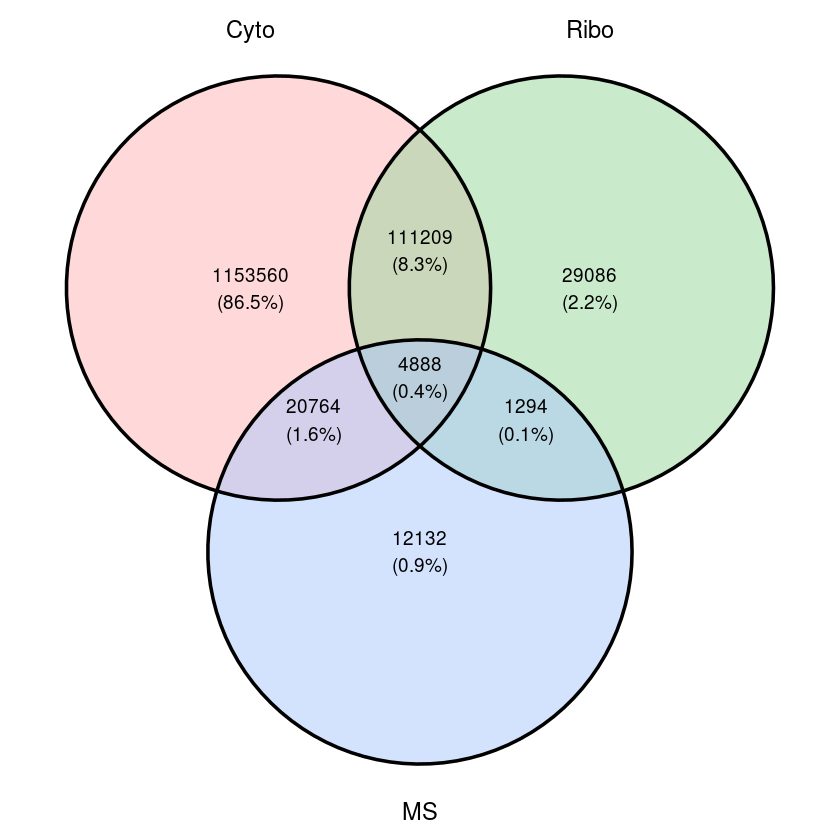

In [39]:
venn_plot_n(list = list(Cyto=full_set_out$ORF_id_custom,Ribo=full_set_ribo$ORF_id_custom,MS=full_set_MS$ORF_id_custom),auto_scale = T,set_name_size=5)